# Salary survey: Data analysis for salary among managers in the world. 

This will be a project based on the CRISP model, this means here will be developed six steps for the analysis:

1.- Business understanding.

2.- Data understanding.

3.- Preparation.

4.- Modeling.

5.- Evaluation.

6.- Deploy.

Maybe here can be used NLP for open questions. 

Will be developed a story about a fictional organization using this data. 


Data recovered from here: https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html

This data is related with salary in many professional fields around the globe. Here are records from managers, systems engineers, librarians, and so on. The example of the questions is the next:

- How old are you?
- What industry do you work in?
- Job title
- If your job title needs additional context, please clarify here:
- What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)
- How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.
- Please indicate the currency
- If "Other," please indicate the currency here:
- If your income needs additional context, please provide it here:
- What country do you work in?
- If you're in the U.S., what state do you work in?
- What city do you work in?
- How many years of professional work experience do you have overall?
- How many years of professional work experience do you have in your field?
- What is your highest level of education completed?
- What is your gender?
- What is your race? (Choose all that apply.)


with this can be started the search and Exploratory Data Analysis

In [1]:
# Imports cell
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations
from pathlib import Path  

In [2]:
salary_survey_data:pd.DataFrame = pd.read_csv('./data/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1 (1).csv', sep=',')

column_names = salary_survey_data.columns


In [3]:
salary_survey_data.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [5]:
salary_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27922 entries, 0 to 27921
Data columns (total 18 columns):
 #   Column                                                                                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                --------------  -----  
 0   Timestamp                                                                                                                                                                                                                             27922 non-null  object 
 1   How old are you?                                                                                             

In [6]:
salary_survey_data.shape

(27922, 18)

This dataset have a shape of 27922 rows and 18 columns. 
Six categorical variables: 
- Industry, 
- US state, 
- Education level, 
- Gender
- Currency  
- Race

Race is treated as string, with values separated by commas, because is a multiple choide question variable. Hence, this last variable requires special treatment, like dummy variables. 

Three rank variables:
- Age
- Total years of work
- Field years of work

Six character variables:
- Job title
- Job context
- Other currency
- Income text
- Country
- City

Two numerical variables
- Annual salary
- Additional compensation


We have one last variable: Timestamp. Date and moment when the observation was recorder.

Numerical variables have a trouble: are actually strings, it's necessary to replace them by numbers based on strings.

After that, is necessary to set together categorical variables and numerical variables. The free text variables will be removed from this initial part of analysis, and missing values (NaN) will be replaced by -99.

In [7]:

categorical_variables = [
  column_names[1],
  column_names[2],
  column_names[3],
  column_names[7],
  column_names[10],
  column_names[11],
  column_names[12],
  column_names[13],
  column_names[14],
  column_names[15],
  column_names[16],
  ]

continuous_variables = [
  column_names[5],
  column_names[6],
]

# This for is used to convert string types to int types in salary column.
for i in range(len(salary_survey_data[column_names[5]])):
  if isinstance(salary_survey_data[column_names[5]][i], str):
    salary_survey_data[column_names[5]][i] = float(salary_survey_data[column_names[5]][i].replace(",", ""))

for i in range(len(salary_survey_data[column_names[6]])):
  if isinstance(salary_survey_data[column_names[6]][i], str):
    salary_survey_data[column_names[6]][i] = float(salary_survey_data[column_names[5]][i].replace(",", ""))

# This is used to replace NaN for 0's

salary_survey_data[column_names[5]] = salary_survey_data[column_names[5]].replace(np.nan, 0)
salary_survey_data[column_names[6]] = salary_survey_data[column_names[6]].replace(np.nan, 0)

# This function is used to replace missing values in cat variables with a -99 
# To indentify null values. 
for cat_var in categorical_variables:
  salary_survey_data[cat_var] = salary_survey_data[cat_var].replace(np.nan, '-99')


/tmp/ipykernel_23846/3687890412.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_survey_data[column_names[5]][i] = float(salary_survey_data[column_names[5]][i].replace(",", ""))


In [8]:
#This is used as a reference to enumerate fast columns. This will be patched with a data dictionary
#And a column name replacement

for i in range(len(categorical_variables)):
  print(f'column number {i} is {categorical_variables[i]}')

column number 0 is How old are you?
column number 1 is What industry do you work in?
column number 2 is Job title
column number 3 is Please indicate the currency
column number 4 is What country do you work in?
column number 5 is If you're in the U.S., what state do you work in?
column number 6 is What city do you work in?
column number 7 is How many years of professional work experience do you have overall?
column number 8 is How many years of professional work experience do you have in your field?
column number 9 is What is your highest level of education completed?
column number 10 is What is your gender?


Now, there are no NaN values. They where replaced by float numbers. Now is necessary to create a correlation matrix and get frequencies tables from the categorical variables to get majorities, and get basic descriptive values from numeric variables, the salary and the compensations. Will be created a new DataFrame with categorical variables and numerical variables, deleting the free answer variables.

In [10]:
#List of numeric and categorical variables to create the new data frame
salary_survey_features_names = [*categorical_variables, *continuous_variables]

salary_survey_features = salary_survey_data.loc[:, salary_survey_features_names].copy()

#This renaming is used to get a rigth features names in the correlation matrix
salary_survey_features.rename(columns ={
  salary_survey_features_names[0] : 'age',
  salary_survey_features_names[1] : 'industry',
  salary_survey_features_names[2] : 'job title',
  salary_survey_features_names[3] : 'currency',
  salary_survey_features_names[4] : 'country',
  salary_survey_features_names[5] : 'us state',
  salary_survey_features_names[6] : 'city',
  salary_survey_features_names[7] : 'total years of work',
  salary_survey_features_names[8] : 'current field years of work',
  salary_survey_features_names[9] : 'education level',
  salary_survey_features_names[10] : 'gender',
  salary_survey_features_names[11] : 'annual salary',
  salary_survey_features_names[12] : 'monetary compensation',
}, inplace=True)

#This is printed to make sure that columns and values are right
salary_survey_features.head()

,age,industry,job title,currency,country,us state,city,total years of work,current field years of work,education level,gender,annual salary,monetary compensation
0,25-34,Education (Higher Education),Research and Instruction Librarian,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,55000.0,0.0
1,25-34,Computing or Tech,Change & Internal Communications Manager,GBP,United Kingdom,-99,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,54600.0,4000.0
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,34000.0,0.0
3,25-34,Nonprofits,Program Manager,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,62000.0,3000.0
4,25-34,"Accounting, Banking & Finance",Accounting Manager,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,60000.0,7000.0


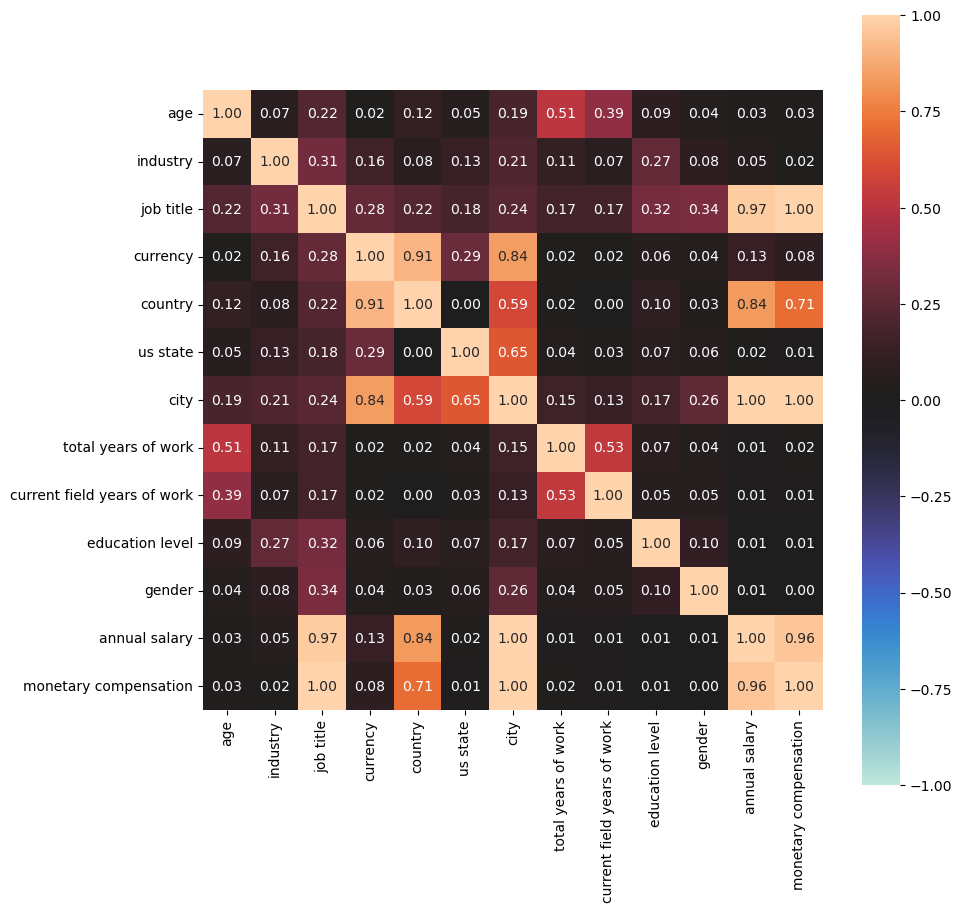

In [11]:
salary_survey_correlations = associations(
  dataset = salary_survey_features,
  nominal_columns = [
      'age',
      'industry',
      'job title',
      'currency',
      'country',
      'us state',
      'city',
      'total years of work',
      'current field years of work',
      'education level',
      'gender',
  ],
  figsize=(10,10)
)

In [12]:
categorical_variables_description = {}

for i in range(len(categorical_variables)):
  categorical_variables_description[f'column {i}'] = {
    'column name': categorical_variables[i],
    'column unique values': salary_survey_data[categorical_variables[i]].unique(),
    'column unique values amount': len(salary_survey_data[categorical_variables[i]].unique()),
  }
cat_vars_description_df = pd.DataFrame.from_dict(categorical_variables_description, orient='index')

In [13]:
cat_vars_description_df.sort_values(by=['column unique values amount'])

,column name,column unique values,column unique values amount
column 10,What is your gender?,"[Woman, Non-binary, Man, -99, Other or prefer ...",6
column 0,How old are you?,"[25-34, 45-54, 35-44, 18-24, 65 or over, 55-64...",7
column 9,What is your highest level of education comple...,"[Master's degree, College degree, PhD, -99, So...",7
column 7,How many years of professional work experience...,"[5-7 years, 8 - 10 years, 2 - 4 years, 21 - 30...",8
column 8,How many years of professional work experience...,"[5-7 years, 2 - 4 years, 21 - 30 years, 11 - 2...",8
column 3,Please indicate the currency,"[USD, GBP, CAD, EUR, AUD/NZD, Other, CHF, ZAR,...",11
column 5,"If you're in the U.S., what state do you work in?","[Massachusetts, -99, Tennessee, Wisconsin, Sou...",132
column 4,What country do you work in?,"[United States, United Kingdom, US, USA, Canad...",368
column 1,What industry do you work in?,"[Education (Higher Education), Computing or Te...",1210
column 6,What city do you work in?,"[Boston, Cambridge, Chattanooga, Milwaukee, Gr...",4793


At this point, there are the unique values for each categorical value. After currency, the values are too big to be counted in a frequency table. Later in this analysis dimentions will be reduced, by now, the frequencies for the rest variables are:

/tmp/ipykernel_23846/1872870110.py:53: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


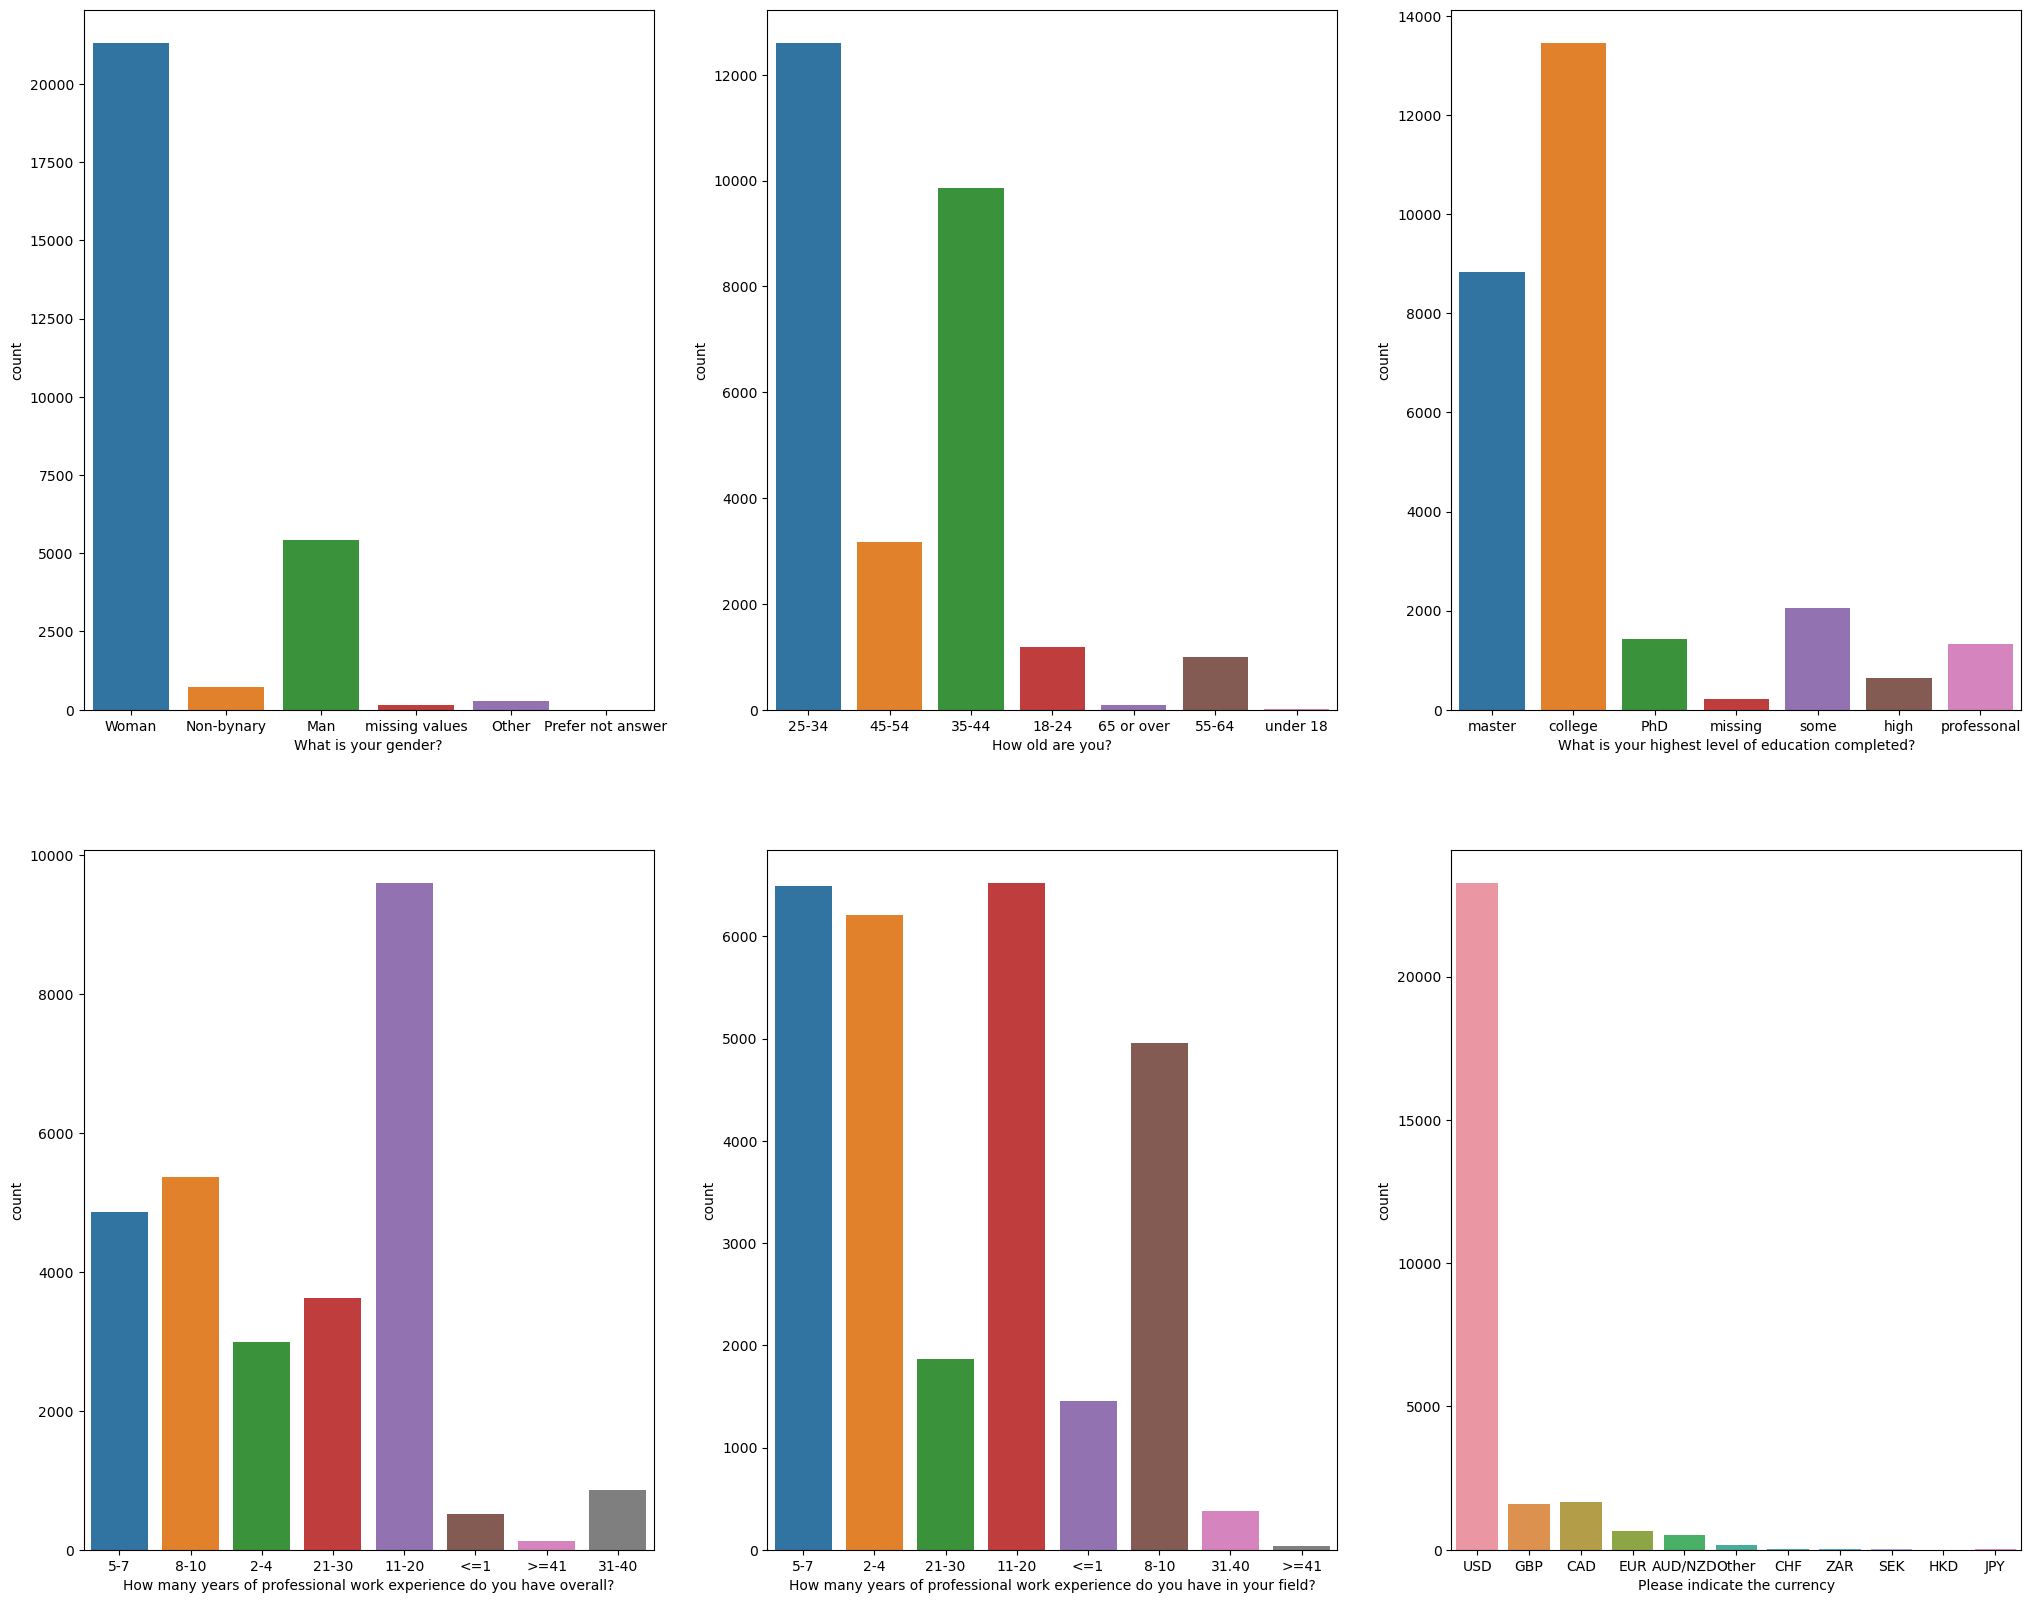

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(25, 20))

gender_plot = sns.countplot(data=salary_survey_data, x = categorical_variables[10], ax=ax[0][0])
# print(gender_plot.get_xticklabels())
gender_plot.set_xticklabels(
  [
    'Woman', 
    'Non-bynary', 
    'Man', 
    'missing values', 
    'Other',
    'Prefer not answer'
  ]
)

age_plot = sns.countplot(data=salary_survey_data, x = categorical_variables[0], ax=ax[0][1])

education_plot = sns.countplot(data=salary_survey_data, x = categorical_variables[9], ax=ax[0][2])
education_plot.set_xticklabels(['master', 'college', 'PhD', 'missing', 'some', 'high', 'professonal'])

total_years_of_work = sns.countplot(data=salary_survey_data, x = categorical_variables[7], ax=ax[1][0])
# total_years_of_work.get_xticklabels()
total_years_of_work.set_xticklabels(
  [
    '5-7',
    '8-10',
    '2-4',
    '21-30',
    '11-20',
    '<=1',
    '>=41',
    '31-40'
  ]
)

field_years_of_work = sns.countplot(data=salary_survey_data, x = categorical_variables[8], ax=ax[1][1])
field_years_of_work.set_xticklabels(
  [
    '5-7',
    '2-4',
    '21-30',
    '11-20',
    '<=1',
    '8-10',
    '31.40',
    '>=41',
  ]
)

currency_plot = sns.countplot(data=salary_survey_data, x = categorical_variables[3],ax=ax[1][2])
currency_plot.get_xticklabels()

fig.show()


TO-DO: Amend this paragraph

After check the multiple values, the best approach to get more insights from the data is separate the major gruop of currency, in this case, all related with USD. The numeric 
values in the annual salary are some out of range, maybe the anothers country payments are in USD, hence it's better start to see what's happening in the USD payments.

[Text(0, 0.5, 'Annual salary')]

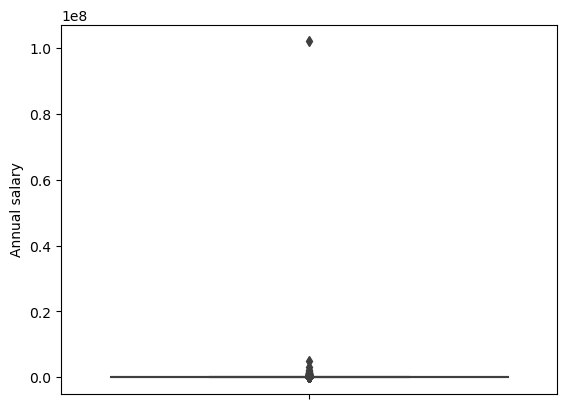

In [15]:
usd_salary_group = salary_survey_data[salary_survey_data[categorical_variables[3]] == 'USD']
annual_salary_boxplot = sns.boxplot(
  data=usd_salary_group, 
  y=continuous_variables[0],
)

annual_salary_boxplot.set(ylabel='Annual salary')

In [16]:
usd_salary_group[usd_salary_group[continuous_variables[0]] == usd_salary_group[continuous_variables[0]].max()]

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
3605,4/27/2021 12:11:17,25-34,Utilities & Telecommunications,Operations Manager,NaN,102000000.0,0.0,USD,COP,Colombian peso - converting to usd it seems lo...,Colombia,-99,Bogota,8 - 10 years,1 year or less,Some college,Man,"Hispanic, Latino, or Spanish origin"


TO-DO: Amend this paragraph

This box plot from the annual salary in USD showns that there are a lot of outliers values, that value near to one hundred millions it's the most obvious. Let's clean this little set from all data bigger than 20,000,000

[Text(0, 0.5, 'Annual salary')]

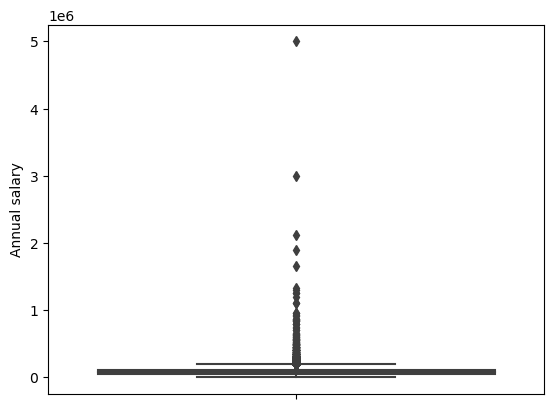

In [17]:
usd_salary_group = usd_salary_group[usd_salary_group[continuous_variables[0]] < 20000000]
annual_salary_boxplot = sns.boxplot(
  data=usd_salary_group, 
  y=continuous_variables[0],
)

annual_salary_boxplot.set(ylabel='Annual salary')

In [18]:
usd_salary_group[usd_salary_group[continuous_variables[0]] == usd_salary_group[continuous_variables[0]].max()]

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
26466,6/14/2021 4:19:17,55-64,Sales,Inside sales manager,NaN,5000044.0,4000.0,USD,NaN,NaN,Usa,New Jersey,Pinebrook,31 - 40 years,21 - 30 years,Master's degree,Woman,Black or African American


TO-DO: Amend this paragraph

Now the biggest outlier is near to 5 millions, less than before but still there a lot of outliers. Let's get rid of those values higher than 175,000

[Text(0, 0.5, 'Annual salary')]

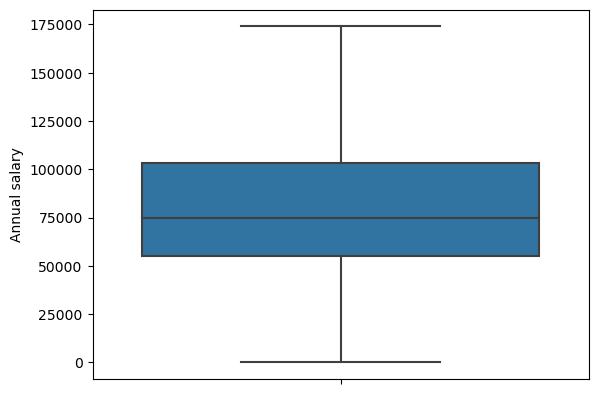

In [19]:
usd_salary_group = usd_salary_group[(usd_salary_group[continuous_variables[0]] < 175000) & usd_salary_group[continuous_variables[0]] > 0]
annual_salary_boxplot = sns.boxplot(
  data=usd_salary_group, 
  y=continuous_variables[0],
)

annual_salary_boxplot.set(ylabel='Annual salary')

In [20]:
annual_salary_mean = usd_salary_group[continuous_variables[0]].mean()
annual_salary_sd = usd_salary_group[continuous_variables[0]].std()
print(f'Annual salary mean is {annual_salary_mean} and its standar deviation is {annual_salary_sd}')

Annual salary mean is 81464.87456301748 and its standar deviation is 34621.25334531605


TO-DO: Amend this paragraph

Now the box plot looks better, but how much data have been removed from the set?

In [21]:
removed_usd_salary_group = salary_survey_data[salary_survey_data[categorical_variables[3]] == 'USD']
removed_usd_salary_group = removed_usd_salary_group[(removed_usd_salary_group[continuous_variables[0]] > 175000) | (removed_usd_salary_group[continuous_variables[0]] <= 0)]
removed_usd_rows, removed_usd_cols = removed_usd_salary_group.shape

no_usd_salary_group = salary_survey_data[salary_survey_data[categorical_variables[3]] != 'USD']
removed_no_usd_rows, removed_no_usd_cols = no_usd_salary_group.shape

print(f'Removed outliers from usd salary group: {removed_usd_rows}')
print(f'Removed rows from no-usd salary group: {removed_no_usd_rows}')
print(f'Total rows removed: {removed_usd_rows + removed_no_usd_rows}')

Removed outliers from usd salary group: 1400
Removed rows from no-usd salary group: 4655
Total rows removed: 6055


In [38]:
print('Full data gender count')
print(salary_survey_data[categorical_variables[10]].value_counts())
print('USD data gender count')
print(usd_salary_group[categorical_variables[10]].value_counts())
print('Outliers USD data gender count')
print(removed_usd_salary_group[categorical_variables[10]].value_counts())
print('No-USD data gender count')
print(no_usd_salary_group[categorical_variables[10]].value_counts())

Full data gender count
Woman                            21304
Man                               5419
Non-binary                         742
Other or prefer not to answer      291
-99                                165
Prefer not to answer                 1
Name: What is your gender?, dtype: int64
USD data gender count
Woman                            17186
Man                               3634
Non-binary                         574
Other or prefer not to answer      218
-99                                127
Prefer not to answer                 1
Name: What is your gender?, dtype: int64
Outliers USD data gender count
Woman                            764
Man                              591
Non-binary                        21
Other or prefer not to answer     14
-99                               10
Name: What is your gender?, dtype: int64
No-USD data gender count
Woman                            3283
Man                              1142
Non-binary                        145
Other or 

The rows removed were 6055. Without outliers, an histogram on annual salary can be created, and shown concentration between 40,000.00 USD and 100,000.00 USD. 

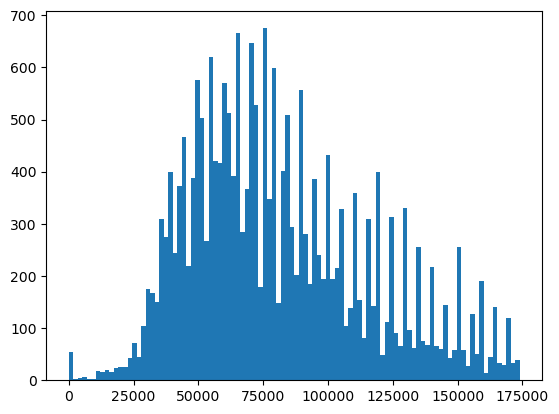

In [22]:
annual_salary = usd_salary_group[continuous_variables[0]]
annual_salary_figure = plt.figure()
annual_salary_plot = annual_salary_figure.add_subplot(111)
counts, bins, patches = annual_salary_plot.hist(
  x=annual_salary,
  bins=100, 
)

plt.show()

In [23]:
usd_salary_survey_features = usd_salary_group.loc[:, salary_survey_features_names].copy()

usd_salary_survey_features.rename(columns ={
  salary_survey_features_names[0] : 'age',
  salary_survey_features_names[1] : 'industry',
  salary_survey_features_names[2] : 'job title',
  salary_survey_features_names[3] : 'currency',
  salary_survey_features_names[4] : 'country',
  salary_survey_features_names[5] : 'us state',
  salary_survey_features_names[6] : 'city',
  salary_survey_features_names[7] : 'total years of work',
  salary_survey_features_names[8] : 'current field years of work',
  salary_survey_features_names[9] : 'education level',
  salary_survey_features_names[10] : 'gender',
  salary_survey_features_names[11] : 'annual salary',
  salary_survey_features_names[12] : 'monetary compensation',
}, inplace=True)

usd_salary_survey_features.head()

,age,industry,job title,currency,country,us state,city,total years of work,current field years of work,education level,gender,annual salary,monetary compensation
0,25-34,Education (Higher Education),Research and Instruction Librarian,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,55000.0,0.0
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,34000.0,0.0
3,25-34,Nonprofits,Program Manager,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,62000.0,3000.0
4,25-34,"Accounting, Banking & Finance",Accounting Manager,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,60000.0,7000.0
5,25-34,Education (Higher Education),Scholarly Publishing Librarian,USD,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,62000.0,0.0


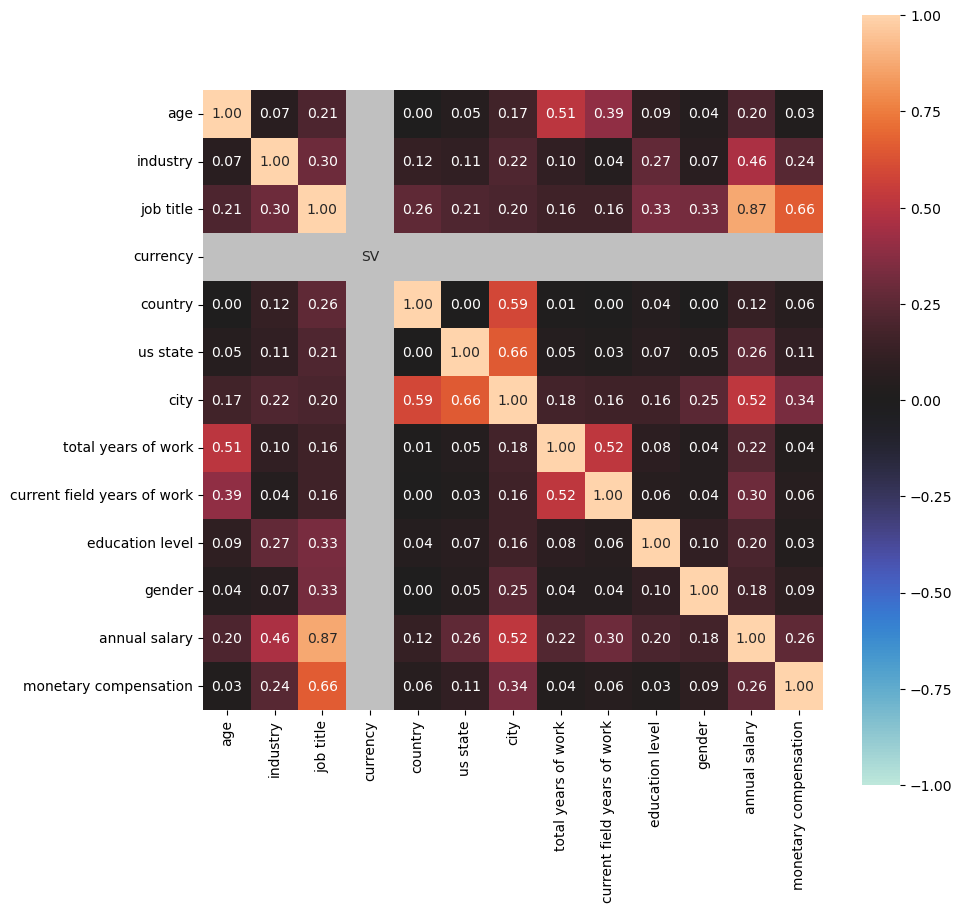

In [24]:
usd_salary_survey_correlations = associations(
  dataset = usd_salary_survey_features,
  nominal_columns = [
      'age',
      'industry',
      'job title',
      'currency',
      'country',
      'us state',
      'city',
      'total years of work',
      'current field years of work',
      'education level',
      'gender',
  ],
  figsize=(10,10)
)

Now what is happening among the another classes and their relations? Let's start from gender and age ranks

<AxesSubplot:xlabel='Overall years experience'>

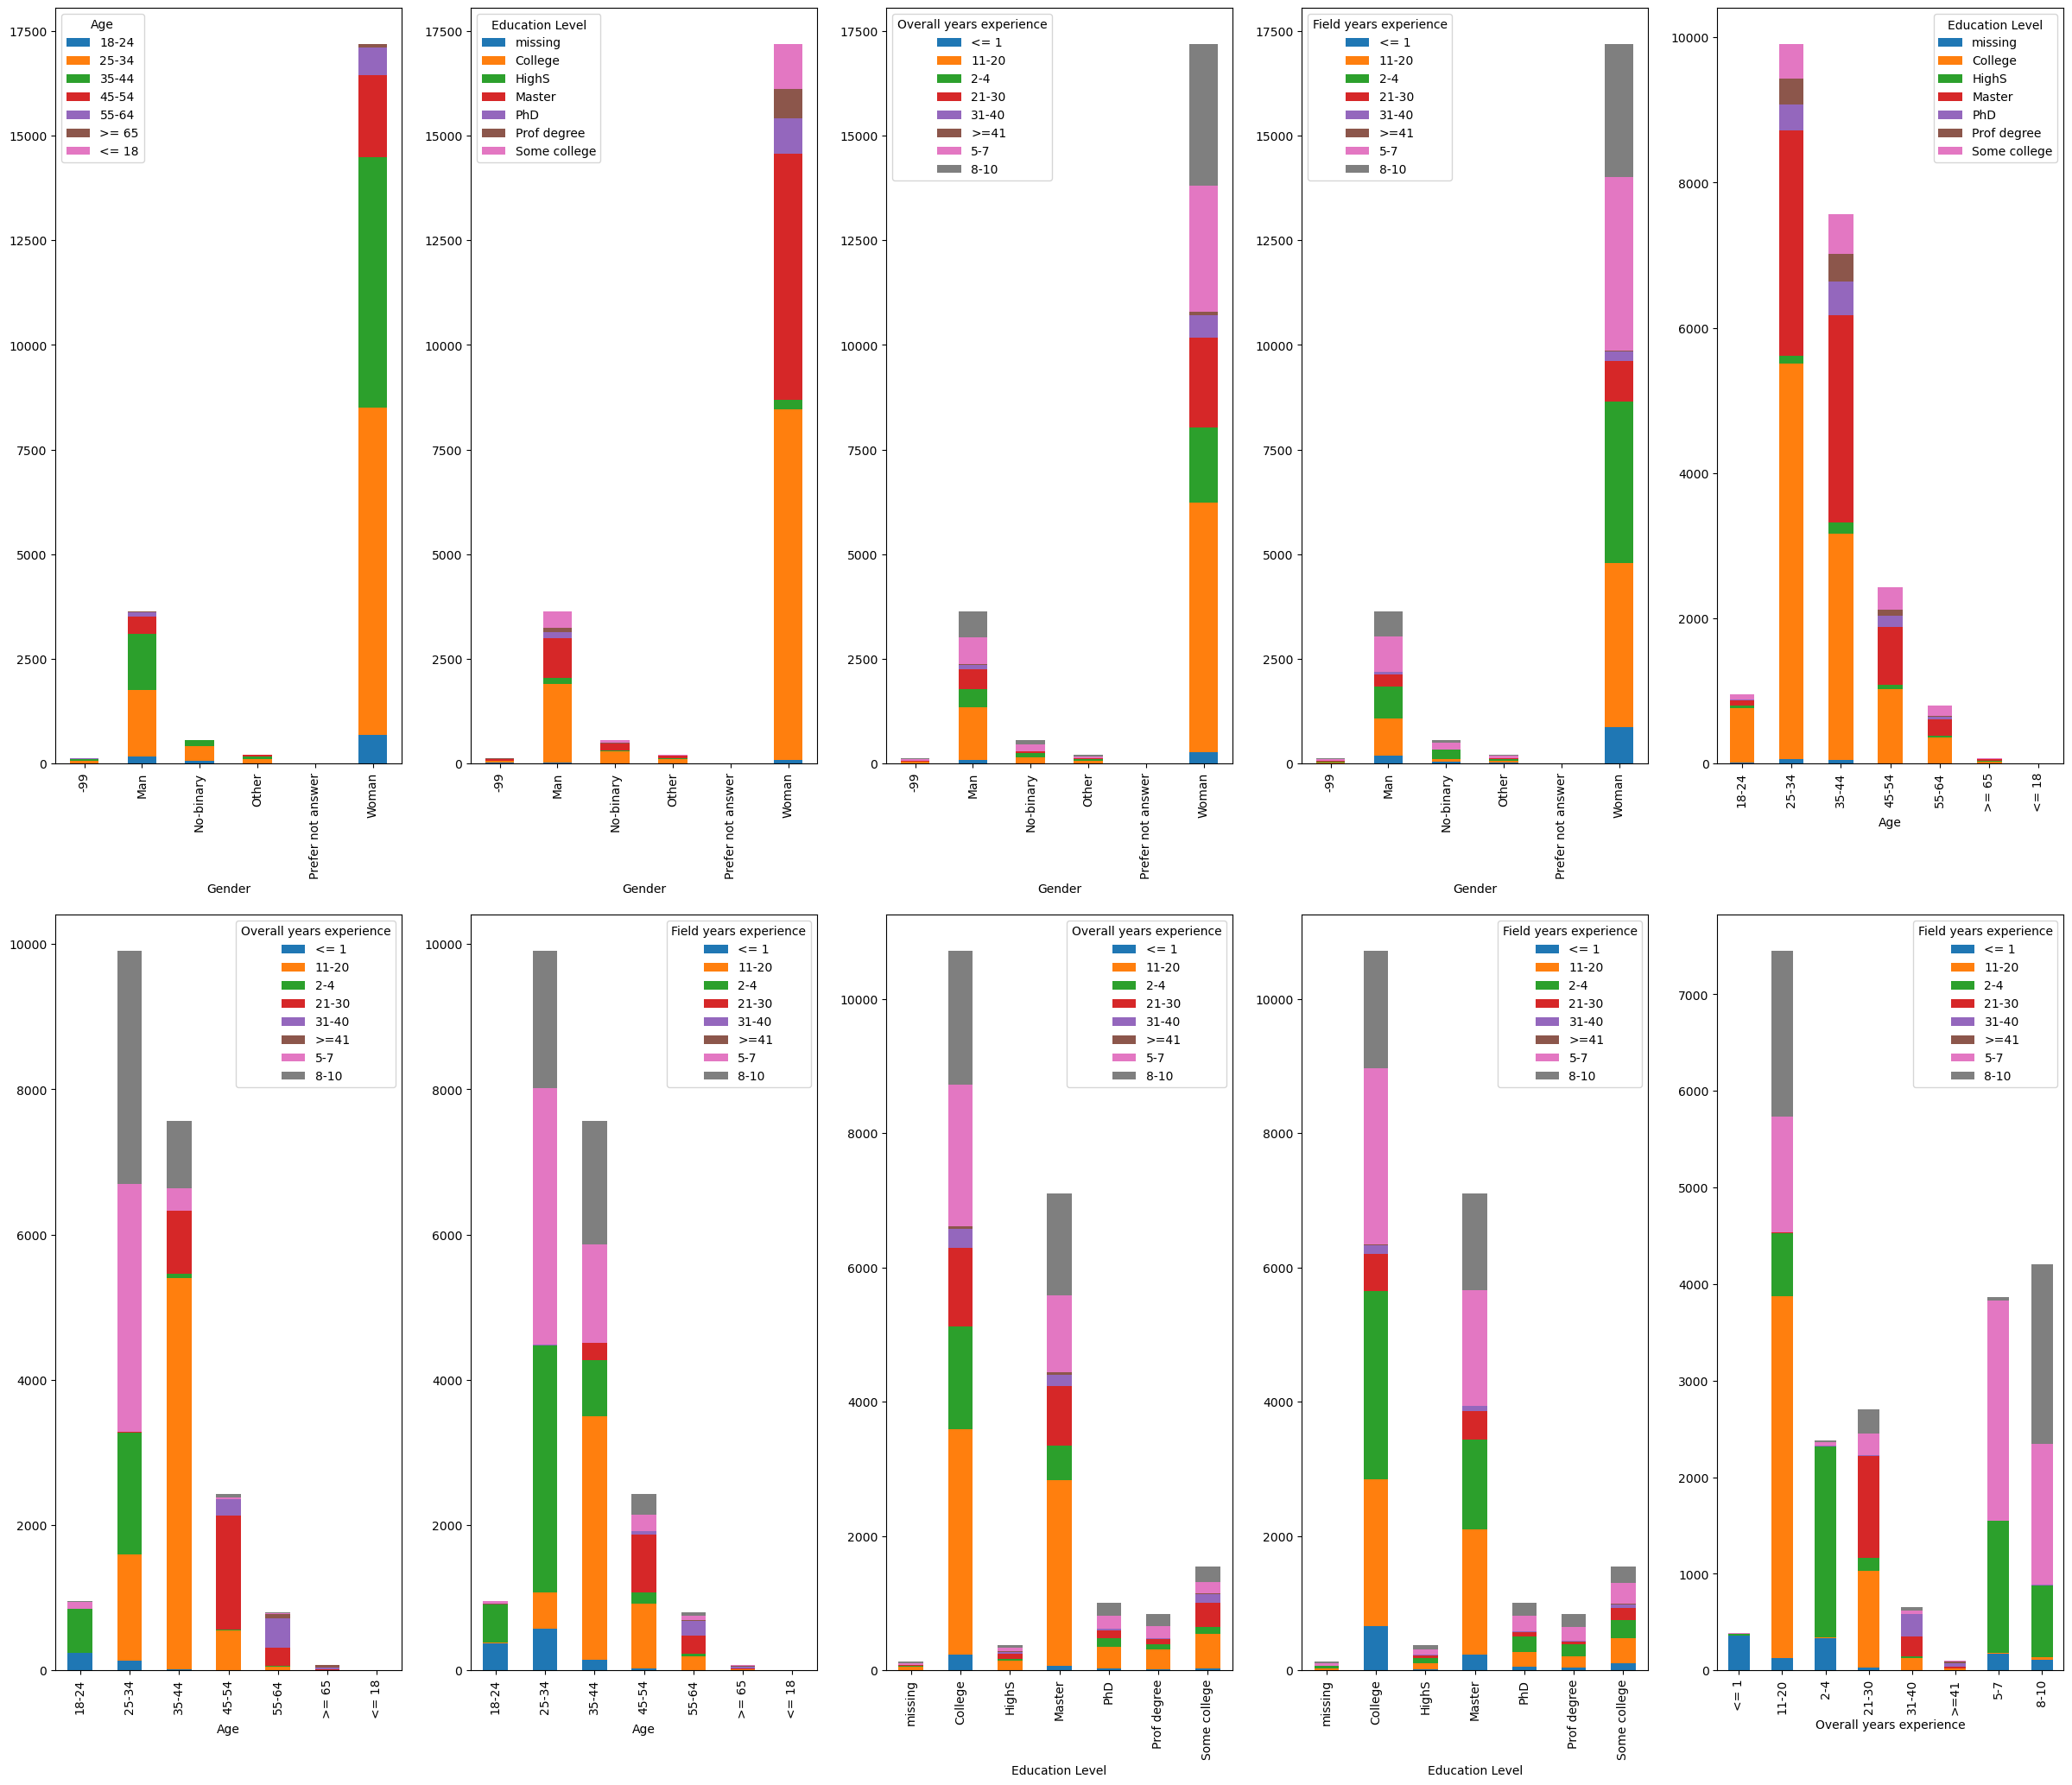

In [25]:
# Crosstabs total figure
gender_cat_var = categorical_variables[10]
age_cat_var = categorical_variables[0]
education_cat_var = categorical_variables[9]
overall_experience_cat_var = categorical_variables[7]
field_experience_cat_var = categorical_variables[8]

gender_rename_values = {
    '-99' : '-99',
    'Man' : 'Man',
    'Non-binary' : 'No-binary',
    'Other or prefer not to answer' : 'Other',
    'Prefer not to answer' : 'Prefer not answer',
    'Woman' : 'Woman',
}

age_rename_values = { 
  '65 or over': '>= 65', 
  'under 18': '<= 18',
}

['master', 'college', 'PhD', 'missing', 'some', 'high', 'professonal']

education_rename_values = {
  '-99': 'missing',
  'College degree': 'College',
  'High School': 'HighS',
  "Master's degree": 'Master',
  'PhD': 'PhD',
  'Professional degree (MD, JD, etc.)': 'Prof degree', 
  'Some college': 'Some college',
}

overall_experience_rename_values = {
  '1 year or less': '<= 1',
  '11 - 20 years': '11-20',
  '2 - 4 years': '2-4',
  '21 - 30 years': '21-30',
  '31 - 40 years': '31-40',
  '41 years or more': '>=41',
  '5-7 years': '5-7',
  '8 - 10 years': '8-10',
}

field_experience_rename_values = {
  '1 year or less': '<= 1',
  '11 - 20 years': '11-20',
  '2 - 4 years': '2-4',
  '21 - 30 years': '21-30',
  '31 - 40 years': '31-40',
  '41 years or more': '>=41',
  '5-7 years': '5-7',
  '8 - 10 years': '8-10',
}

crosstab_multiplot_fig = plt.figure(figsize = (30,25))

# TO-DO: Add labels for each crosstab to prevent overlaping labels
ax1 = crosstab_multiplot_fig.add_subplot(2, 5, 1)
gender_age_crosstab = pd.crosstab(usd_salary_group[gender_cat_var], usd_salary_group[age_cat_var])
gender_age_crosstab.rename(
  columns=age_rename_values, 
  index=gender_rename_values,
  inplace=True,
)
gender_age_crosstab.rename_axis(index='Gender', columns='Age', inplace=True)
gender_age_crosstab.plot(kind='bar', stacked=True, ax=ax1)

ax2 = crosstab_multiplot_fig.add_subplot(2, 5, 2)
gender_education_crosstab = pd.crosstab(usd_salary_group[gender_cat_var], usd_salary_group[education_cat_var])
gender_education_crosstab.rename(
  columns=education_rename_values,
  index=gender_rename_values,
  inplace=True,
)
gender_education_crosstab.rename_axis(index='Gender', columns='Education Level', inplace=True)
gender_education_crosstab.plot(kind='bar', stacked=True, ax=ax2)

ax3 = crosstab_multiplot_fig.add_subplot(2, 5, 3)
gender_overall_experiece_crosstab = pd.crosstab(usd_salary_group[gender_cat_var], usd_salary_group[overall_experience_cat_var])
gender_overall_experiece_crosstab.rename(
  columns=overall_experience_rename_values,
  index=gender_rename_values,
  inplace=True,
)
gender_overall_experiece_crosstab.rename_axis(index='Gender', columns='Overall years experience', inplace=True)
gender_overall_experiece_crosstab.plot(kind='bar', stacked=True, ax=ax3)

ax4 = crosstab_multiplot_fig.add_subplot(2, 5, 4)
gender_field_experiece_crosstab = pd.crosstab(usd_salary_group[gender_cat_var], usd_salary_group[field_experience_cat_var])
gender_field_experiece_crosstab.rename(
  columns=field_experience_rename_values,
  index=gender_rename_values,
  inplace=True,
)
gender_field_experiece_crosstab.rename_axis(index='Gender', columns='Field years experience', inplace=True)
gender_field_experiece_crosstab.plot(kind='bar', stacked=True, ax=ax4)

ax5 = crosstab_multiplot_fig.add_subplot(2, 5, 5)
age_education_crosstab = pd.crosstab(usd_salary_group[age_cat_var], usd_salary_group[education_cat_var])
age_education_crosstab.rename(
  columns=education_rename_values,
  index=age_rename_values,
  inplace=True,
)
age_education_crosstab.rename_axis(index='Age', columns='Education Level', inplace=True)
age_education_crosstab.plot(kind='bar', stacked=True, ax=ax5)

ax6 = crosstab_multiplot_fig.add_subplot(2, 5, 6)
age_overall_experience_crosstab = pd.crosstab(usd_salary_group[age_cat_var], usd_salary_group[overall_experience_cat_var])
age_overall_experience_crosstab.rename(
  columns=overall_experience_rename_values,
  index=age_rename_values,
  inplace=True,
)
age_overall_experience_crosstab.rename_axis(index='Age', columns='Overall years experience', inplace=True)
age_overall_experience_crosstab.plot(kind='bar', stacked=True, ax=ax6)

ax7 = crosstab_multiplot_fig.add_subplot(2, 5, 7)
age_field_experience_crosstab = pd.crosstab(usd_salary_group[age_cat_var], usd_salary_group[field_experience_cat_var])
age_field_experience_crosstab.rename(
  columns=field_experience_rename_values,
  index=age_rename_values,
  inplace=True,
)
age_field_experience_crosstab.rename_axis(index='Age', columns='Field years experience', inplace=True)
age_field_experience_crosstab.plot(kind='bar', stacked=True, ax=ax7)

ax8 = crosstab_multiplot_fig.add_subplot(2, 5, 8)
education_overall_experience_crosstab = pd.crosstab(usd_salary_group[education_cat_var], usd_salary_group[overall_experience_cat_var])
education_overall_experience_crosstab.rename(
  columns=overall_experience_rename_values,
  index=education_rename_values,
  inplace=True,
)
education_overall_experience_crosstab.rename_axis(index='Education Level', columns='Overall years experience', inplace=True)
education_overall_experience_crosstab.plot(kind='bar', stacked=True, ax=ax8)

ax9 = crosstab_multiplot_fig.add_subplot(2, 5, 9)
education_field_experience_crosstab = pd.crosstab(usd_salary_group[education_cat_var], usd_salary_group[field_experience_cat_var])
education_field_experience_crosstab.rename(
  columns=field_experience_rename_values,
  index=education_rename_values,
  inplace=True,
)
education_field_experience_crosstab.rename_axis(index='Education Level', columns='Field years experience', inplace=True)
education_field_experience_crosstab.plot(kind='bar', stacked=True, ax=ax9)

ax10 = crosstab_multiplot_fig.add_subplot(2, 5, 10)
overall_field_experience_crosstab = pd.crosstab(usd_salary_group[overall_experience_cat_var], usd_salary_group[field_experience_cat_var])
overall_field_experience_crosstab.rename(
  columns=field_experience_rename_values,
  index=overall_experience_rename_values,
  inplace=True,
)
overall_field_experience_crosstab.rename_axis(index='Overall years experience', columns='Field years experience', inplace=True)
overall_field_experience_crosstab.plot(kind='bar', stacked=True, ax=ax10)


After this preview of some crossed tables, the woman group is huge represented, the age between 25-34 years old rank is the hugest, and let's see another kind of relations.

[Text(0, 0, '25-34'),
 Text(1, 0, '45-54'),
 Text(2, 0, '35-44'),
 Text(3, 0, '18-24'),
 Text(4, 0, '>= 65'),
 Text(5, 0, '55-64'),
 Text(6, 0, '<= 18')]

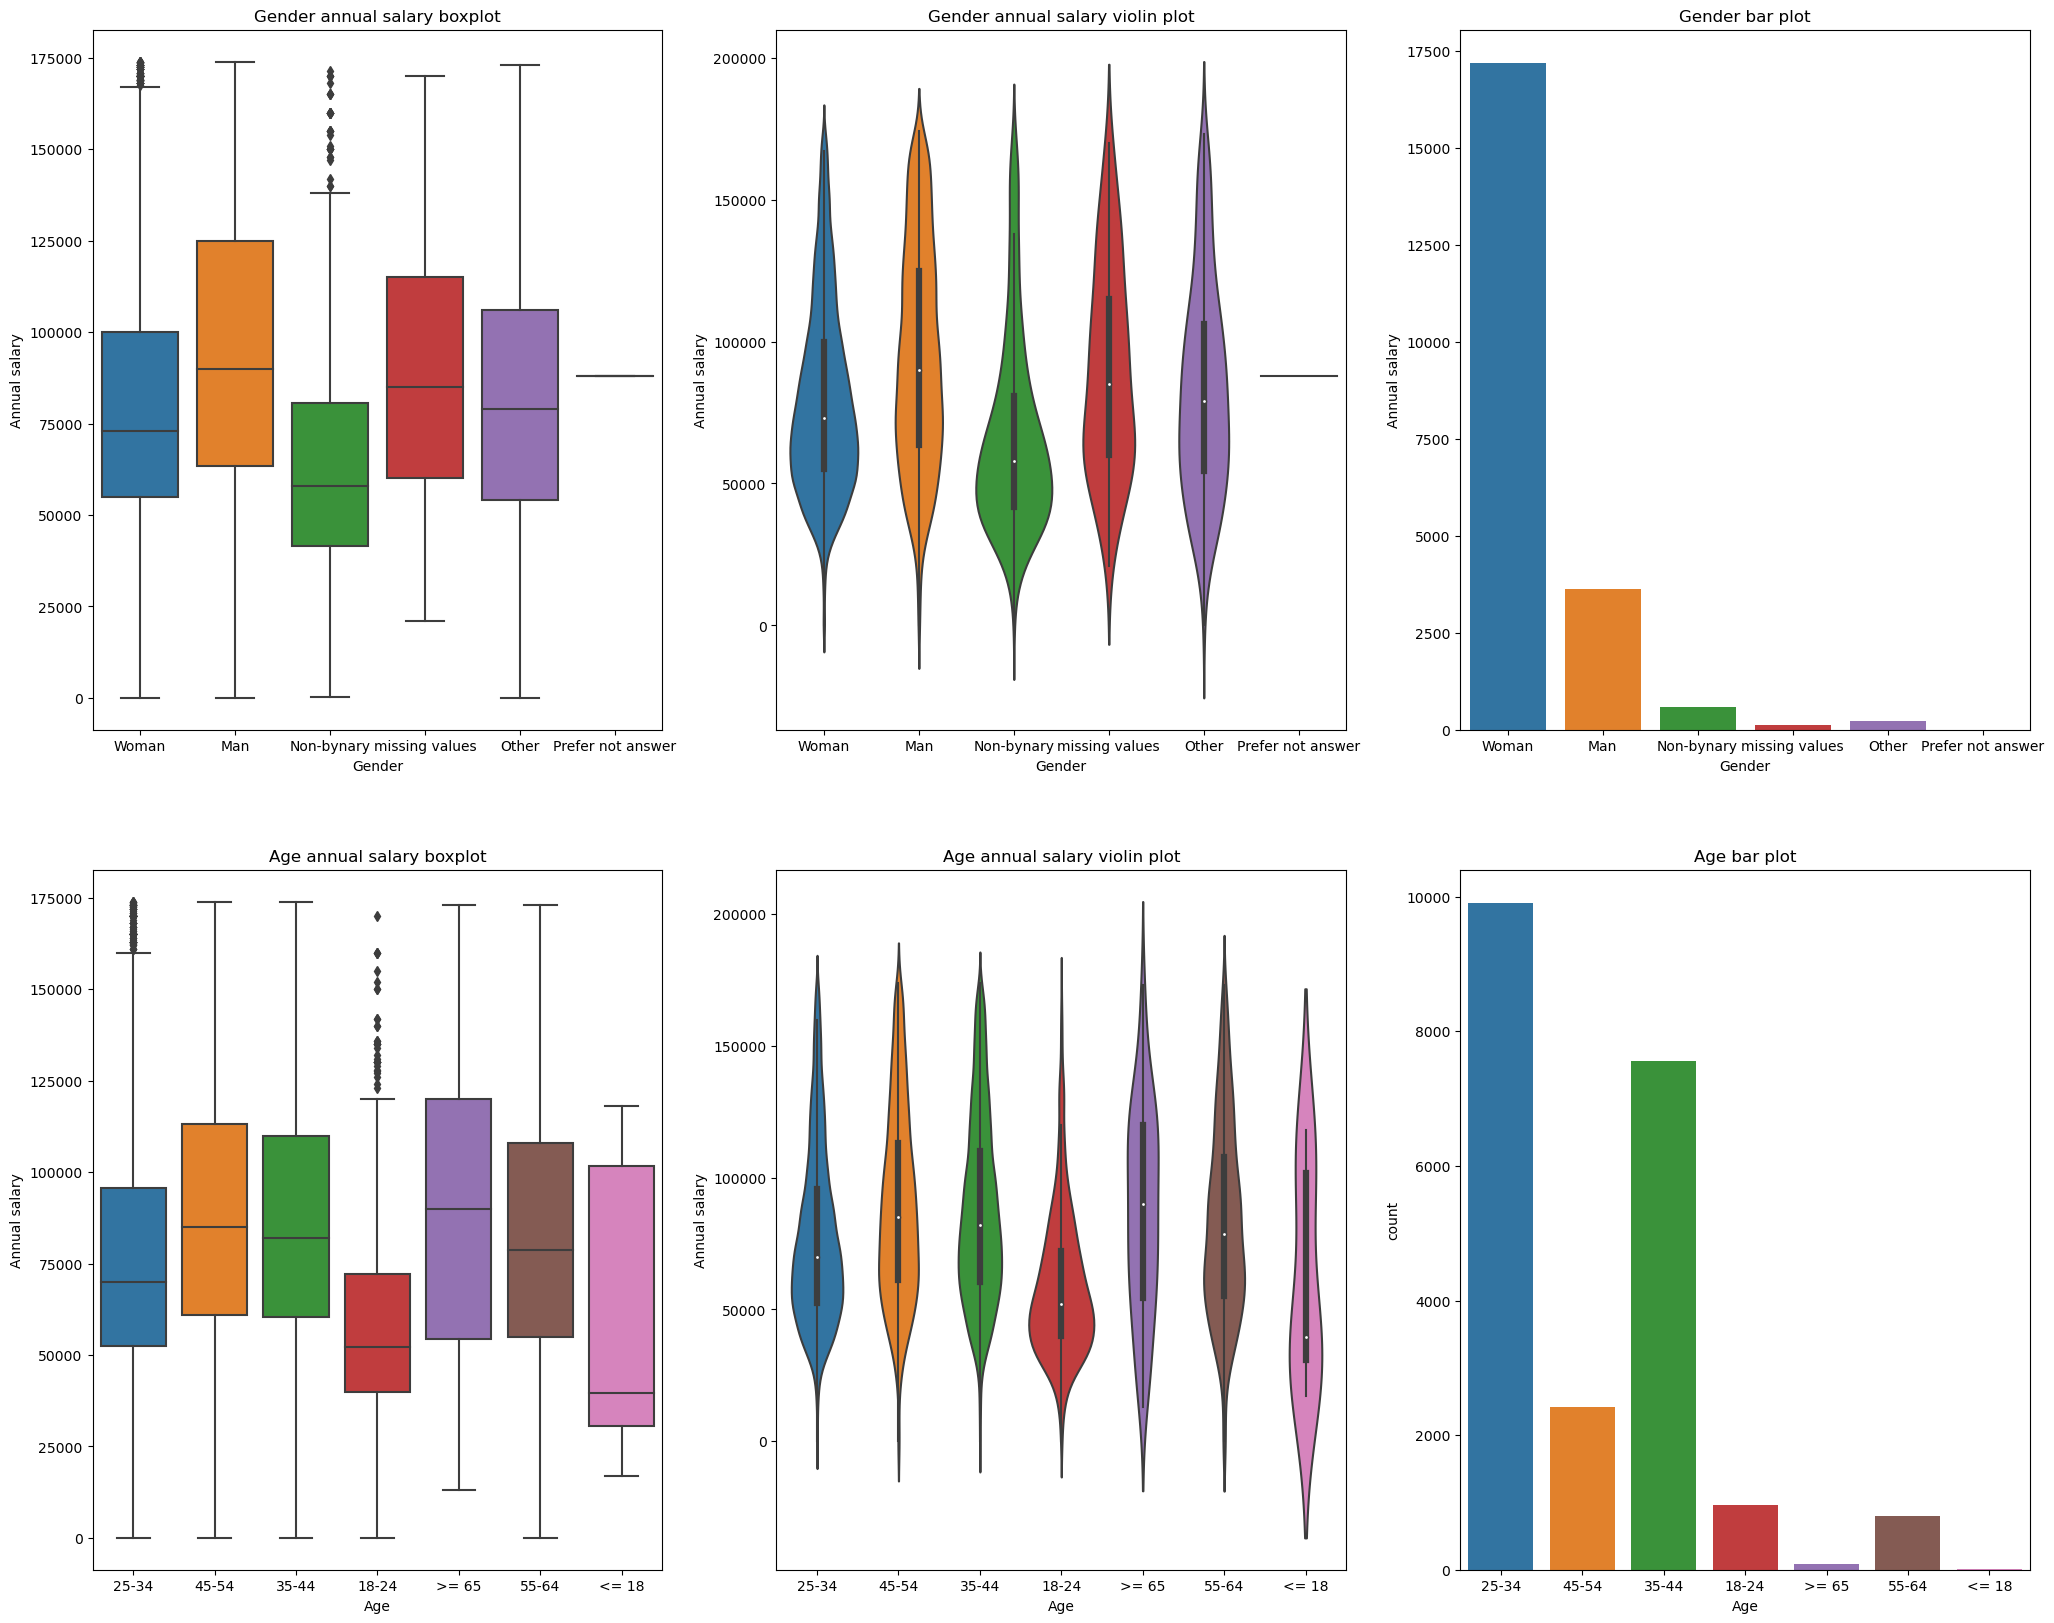

In [57]:
fig, ax = plt.subplots(2, 3, figsize=(25, 20))
gender_annual_salary_boxplot = sns.boxplot(data=usd_salary_group, x=categorical_variables[10], y=continuous_variables[0], ax=ax[0][0])
gender_annual_salary_boxplot.set(ylabel='Annual salary', xlabel='Gender')
gender_annual_salary_boxplot.set_title('Gender annual salary boxplot')
gender_annual_salary_boxplot.set_xticklabels(
  [
    'Woman', 
    'Man', 
    'Non-bynary', 
    'missing values', 
    'Other',
    'Prefer not answer'
  ]
)

gender_annual_salary_violin_plot = sns.violinplot(data=pd.DataFrame(usd_salary_group.to_dict()), x=categorical_variables[10], y=continuous_variables[0], ax=ax[0][1])
gender_annual_salary_violin_plot.set(ylabel='Annual salary', xlabel='Gender')
gender_annual_salary_violin_plot.set_title('Gender annual salary violin plot')
gender_annual_salary_violin_plot.set_xticklabels(
  [
    'Woman', 
    'Man', 
    'Non-bynary', 
    'missing values', 
    'Other',
    'Prefer not answer'
  ]
)

gender_bar_plot = sns.countplot(data=usd_salary_group, x = categorical_variables[10], ax=ax[0][2])
gender_bar_plot.set(xlabel='Gender')
gender_bar_plot.set_title('Gender bar plot')
gender_bar_plot.set_xticklabels(
  [
    'Woman', 
    'Man', 
    'Non-bynary', 
    'missing values', 
    'Other',
    'Prefer not answer'
  ]
)

age_annual_salary_boxplot = sns.boxplot(data=usd_salary_group, x=categorical_variables[0], y=continuous_variables[0], ax=ax[1][0])
age_annual_salary_boxplot.set(ylabel='Annual salary', xlabel='Age')
age_annual_salary_boxplot.set_title('Age annual salary boxplot')
age_annual_salary_boxplot.set_xticklabels(
  [
    '25-34', 
    '45-54', 
    '35-44', 
    '18-24', 
    '>= 65',
    '55-64',
    '<= 18',
  ]
)

age_annual_salary_violin_plot = sns.violinplot(data=pd.DataFrame(usd_salary_group.to_dict()), x=categorical_variables[0], y=continuous_variables[0], ax=ax[1][1])
age_annual_salary_violin_plot.set(ylabel='Annual salary', xlabel='Age')
age_annual_salary_violin_plot.set_title('Age annual salary violin plot')
age_annual_salary_violin_plot.set_xticklabels(
  [
    '25-34', 
    '45-54', 
    '35-44', 
    '18-24', 
    '>= 65',
    '55-64',
    '<= 18',
  ]
)

age_bar_plot = sns.countplot(data=usd_salary_group, x = categorical_variables[0], ax=ax[1][2])
age_bar_plot.set(xlabel='Age')
age_bar_plot.set_title('Age bar plot')
age_bar_plot.set_xticklabels(
  [
    '25-34', 
    '45-54', 
    '35-44', 
    '18-24', 
    '>= 65',
    '55-64',
    '<= 18',
  ]
)


[Text(0, 0, '5-7'),
 Text(1, 0, '2-4'),
 Text(2, 0, '8-10'),
 Text(3, 0, '21-30'),
 Text(4, 0, '11-20'),
 Text(5, 0, '>=41'),
 Text(6, 0, '31-40'),
 Text(7, 0, '<=1')]

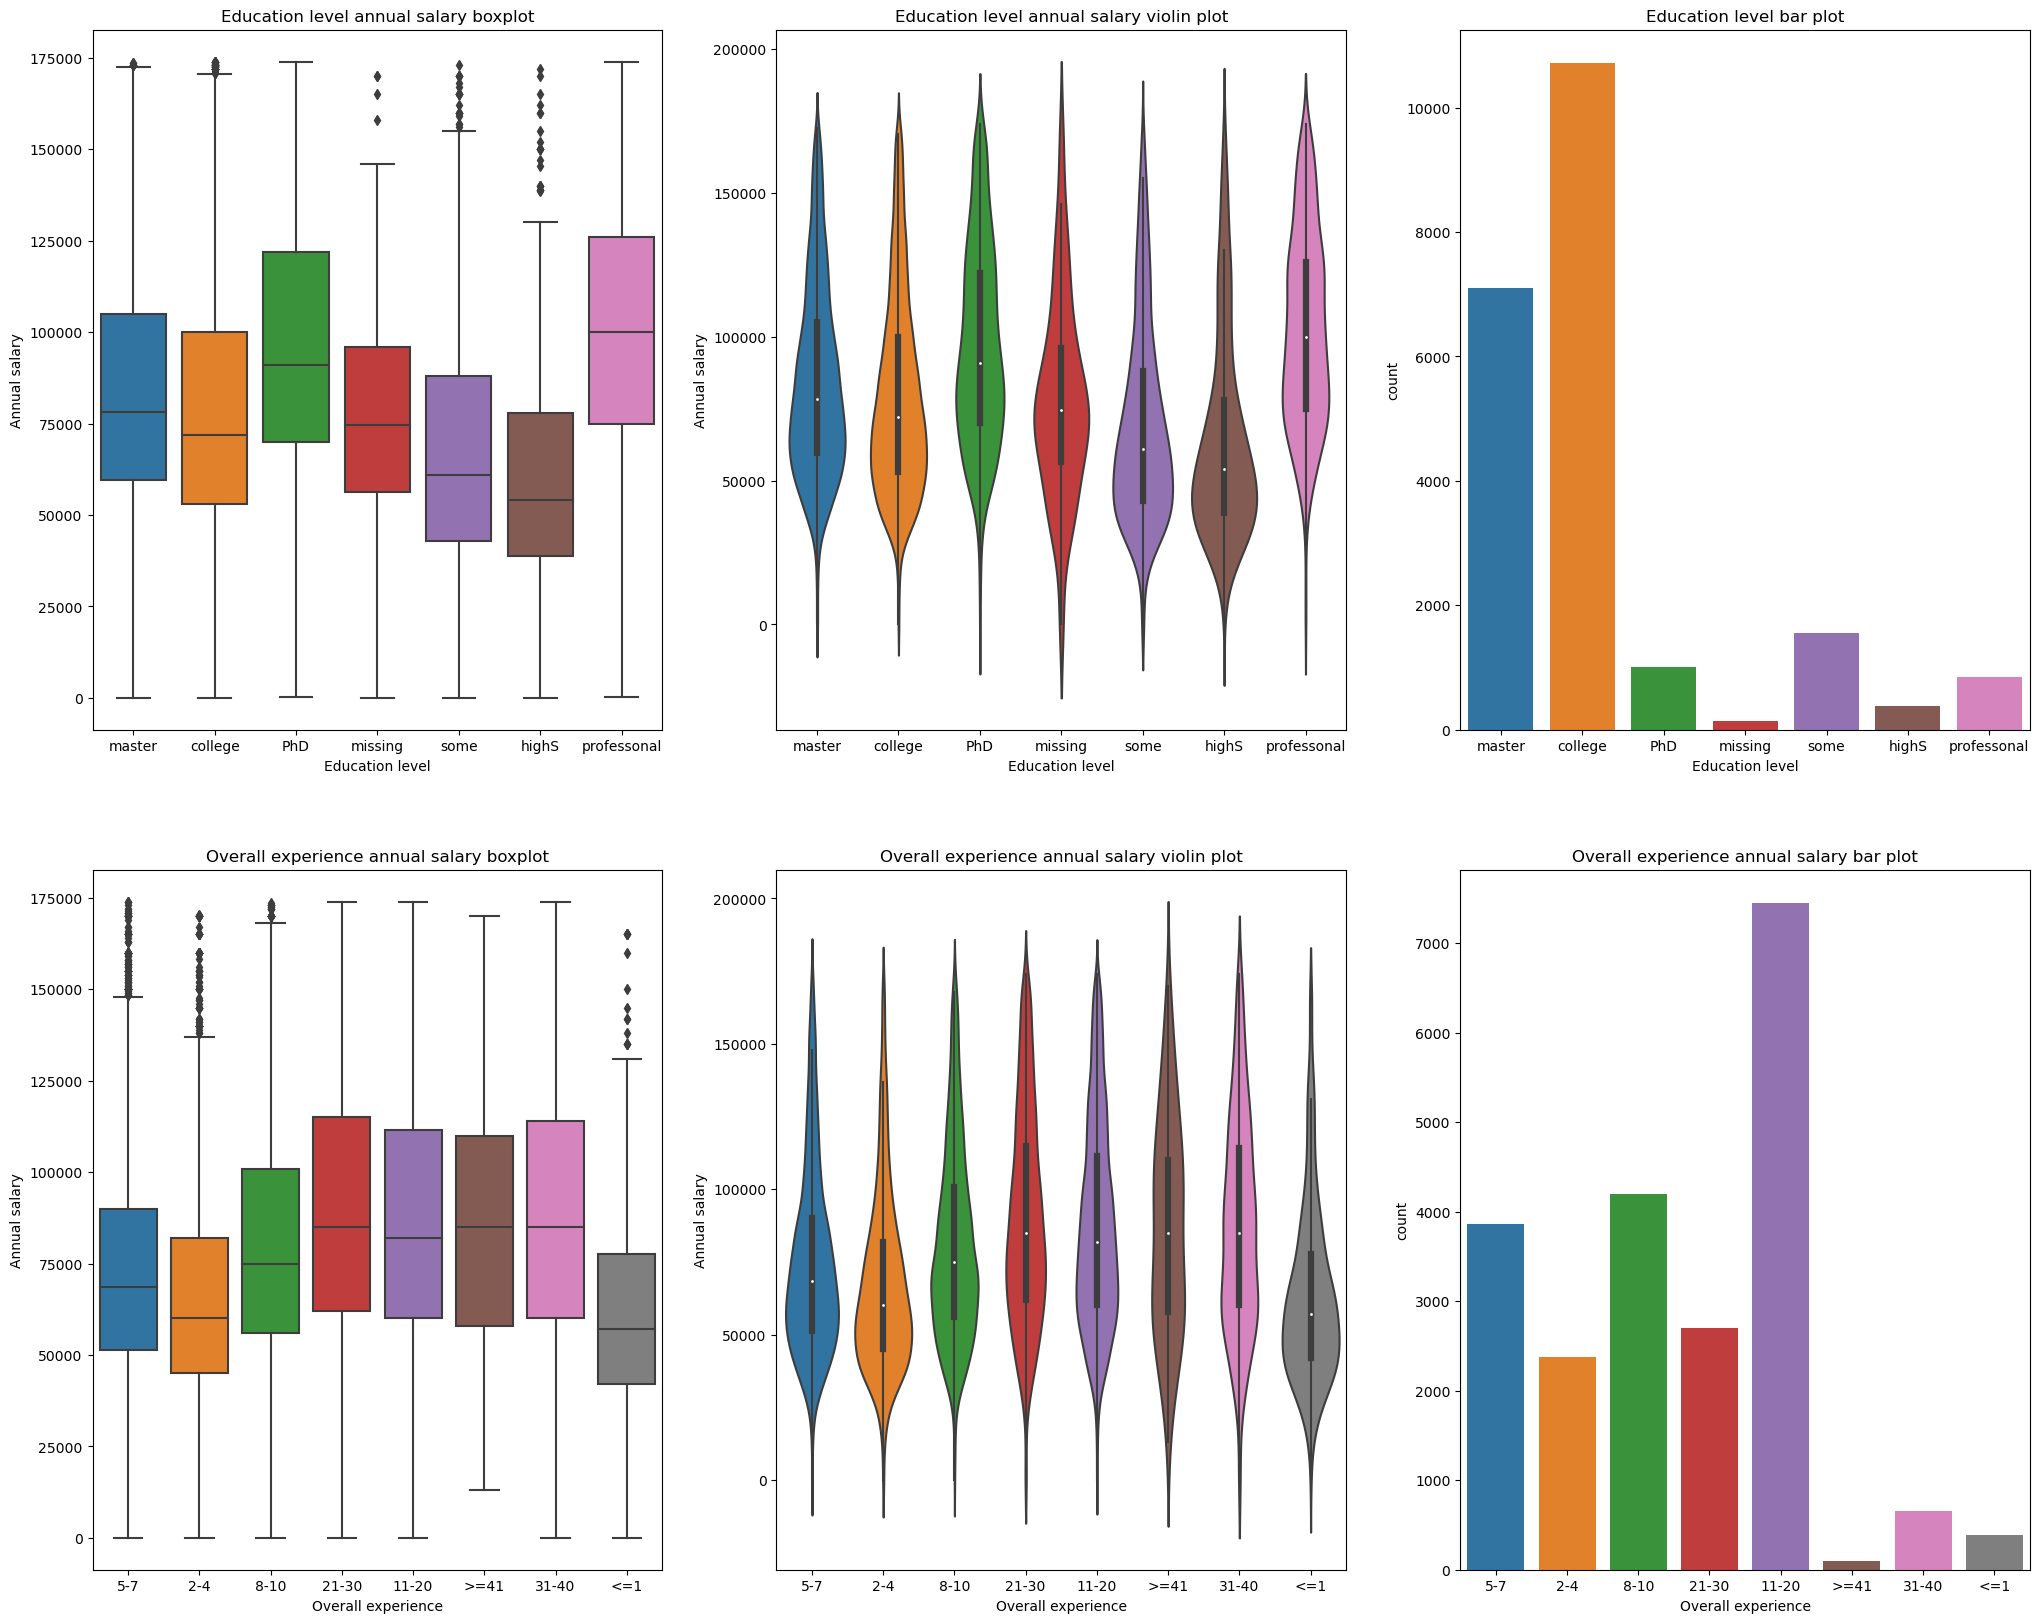

In [64]:
fig, ax = plt.subplots(2, 3, figsize=(25, 20))

education_level_annual_salary_boxplot = sns.boxplot(data=usd_salary_group, x=categorical_variables[9], y=continuous_variables[0], ax=ax[0][0])
education_level_annual_salary_boxplot.set(ylabel='Annual salary', xlabel='Education level')
education_level_annual_salary_boxplot.set_title('Education level annual salary boxplot')
education_level_annual_salary_boxplot.set_xticklabels(['master', 'college', 'PhD', 'missing', 'some', 'highS', 'professonal'])

education_level_salary_violin_plot = sns.violinplot(data=pd.DataFrame(usd_salary_group.to_dict()), x=categorical_variables[9], y=continuous_variables[0], ax=ax[0][1])
education_level_salary_violin_plot.set(ylabel='Annual salary', xlabel='Education level')
education_level_salary_violin_plot.set_title('Education level annual salary violin plot')
education_level_salary_violin_plot.set_xticklabels(['master', 'college', 'PhD', 'missing', 'some', 'highS', 'professonal'])

education_bar_plot = sns.countplot(data=usd_salary_group, x = categorical_variables[9], ax=ax[0][2])
education_bar_plot.set(xlabel='Education level')
education_bar_plot.set_title('Education level bar plot')
education_bar_plot.set_xticklabels(['master', 'college', 'PhD', 'missing', 'some', 'highS', 'professonal'])

overall_experience_annual_salary_boxplot = sns.boxplot(data=usd_salary_group, x=categorical_variables[7], y=continuous_variables[0], ax=ax[1][0])
overall_experience_annual_salary_boxplot.set_xticklabels(
  [
    '5-7',
    '2-4',
    '8-10',
    '21-30',
    '11-20',
    '>=41',
    '31-40',
    '<=1',
  ]
)
overall_experience_annual_salary_boxplot.set(ylabel='Annual salary', xlabel='Overall experience')
overall_experience_annual_salary_boxplot.set_title('Overall experience annual salary boxplot')

overall_experience_annual_salary_violin_plot = sns.violinplot(data=pd.DataFrame(usd_salary_group.to_dict()), x=categorical_variables[7], y=continuous_variables[0], ax=ax[1][1])
overall_experience_annual_salary_violin_plot.set(ylabel='Annual salary', xlabel='Overall experience')
overall_experience_annual_salary_violin_plot.set_title('Overall experience annual salary violin plot')
overall_experience_annual_salary_violin_plot.set_xticklabels(
  [
    '5-7',
    '2-4',
    '8-10',
    '21-30',
    '11-20',
    '>=41',
    '31-40',
    '<=1',
  ]
)

overall_experience_bar_plot = sns.countplot(data=usd_salary_group, x = categorical_variables[7], ax=ax[1][2])
overall_experience_bar_plot.set(xlabel='Overall experience')
overall_experience_bar_plot.set_title('Overall experience annual salary bar plot')
overall_experience_bar_plot.set_xticklabels(
  [
    '5-7',
    '2-4',
    '8-10',
    '21-30',
    '11-20',
    '>=41',
    '31-40',
    '<=1',
  ]
)

[Text(0, 0, '5-7'),
 Text(1, 0, '2-4'),
 Text(2, 0, '21-30'),
 Text(3, 0, '11-20'),
 Text(4, 0, '8-10'),
 Text(5, 0, '<=1'),
 Text(6, 0, '31-40'),
 Text(7, 0, '>=41')]

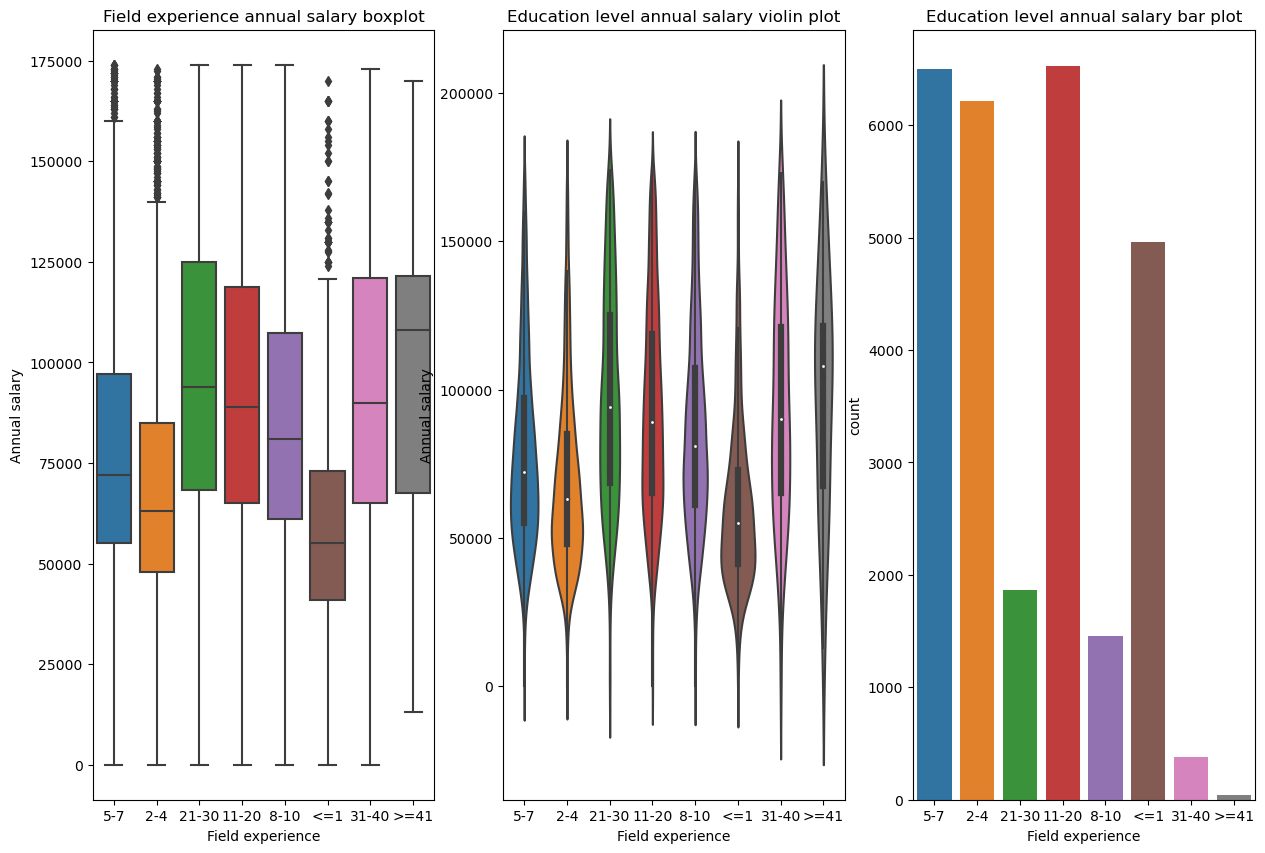

In [63]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

field_experience_annual_salary_boxplot = sns.boxplot(data=usd_salary_group, x = categorical_variables[8], y=continuous_variables[0], ax=ax[0])
field_experience_annual_salary_boxplot.set(ylabel='Annual salary', xlabel='Field experience')
field_experience_annual_salary_boxplot.set_title('Field experience annual salary boxplot')
field_experience_annual_salary_boxplot.set_xticklabels(
  [
    '5-7',
    '2-4',
    '21-30',
    '11-20',
    '8-10',
    '<=1',
    '31-40',
    '>=41',
  ]
)

field_experience_annual_salary_violin_plot = sns.violinplot(data=pd.DataFrame(usd_salary_group.to_dict()), x=categorical_variables[8], y=continuous_variables[0], ax=ax[1])
field_experience_annual_salary_violin_plot.set(ylabel='Annual salary', xlabel='Field experience')
field_experience_annual_salary_violin_plot.set_title('Education level annual salary violin plot')
field_experience_annual_salary_violin_plot.set_xticklabels(
  [
    '5-7',
    '2-4',
    '21-30',
    '11-20',
    '8-10',
    '<=1',
    '31-40',
    '>=41',
  ]
)

field_experience_bar_plot = sns.countplot(data=salary_survey_data, x = categorical_variables[8], ax=ax[2])
field_experience_bar_plot.set(xlabel='Field experience')
field_experience_bar_plot.set_title('Education level annual salary bar plot')
field_experience_bar_plot.set_xticklabels(
  [
    '5-7',
    '2-4',
    '21-30',
    '11-20',
    '8-10',
    '<=1',
    '31-40',
    '>=41',
  ]
)

/home/armsjs/anaconda3/envs/DataSciencePortfolio/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Gender annual salary')

/home/armsjs/anaconda3/envs/DataSciencePortfolio/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


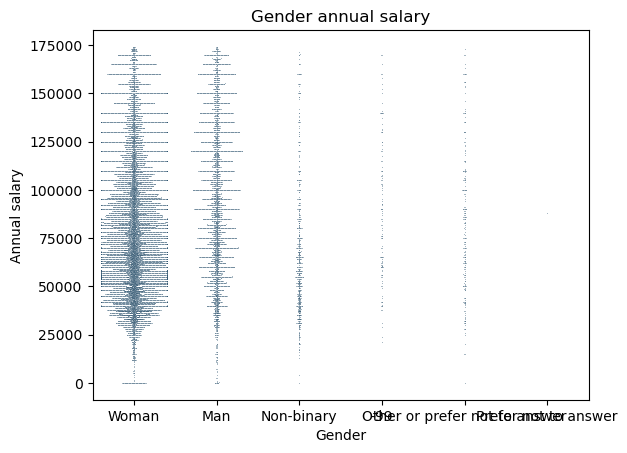

In [29]:
gender_annual_salary_swarmplot = sns.swarmplot(data=usd_salary_group, x=categorical_variables[10], y=continuous_variables[0], s=0.4)
gender_annual_salary_swarmplot.set(ylabel='Annual salary', xlabel='Gender')
gender_annual_salary_swarmplot.set_title('Gender annual salary')

Now there are a few descriptions of groups and subgroups distributed among categories. The next step is balancing the data, with the advantaje of the amount of data the subsampling techniques can be applied to bring weighted samples. Further, for classification, here can be implemented decision trees, but before, should be verified each assumption. Even can be prepared data to do an ANOVA.

Another interesting information are the large amount of outliers, compared with some sources, the salaries are too big, even for the greates salary founded in internet, but, it's possible that some records maybe are wrong, or maybe are from CEO's, the last case is very hard to probe. 

Some TO-DO's:
Reduce dimensions of 'Job Title' feature, because have some repeated values impossible to detect as a result of the way the values are written (example: 'U.S.' and 'United States')

Compare the current data distributions and descriptions with the data recovered from internet and main pages about salaries. Compare using hipothesis testing.

Create subgroups from men and women and analyze differences.

Start to planning machine learning models to improbe predictions about salary

Some sources:

https://learn.org/articles/What_is_the_Average_Salary_for_HR_Directors.html
https://www.floods.org/career-center/careers-in-floodplain-management/salary-information/
https://www.humanservicesedu.org/human-services-salary/
https://www.worlddata.info/average-income.php
https://webbspy.com/top-10-highest-paid-employees-in-the-world/
https://www.weforum.org/agenda/2018/12/these-countries-have-the-highest-minimum-wages/
https://www.hotosm.org/salaries
https://www.ilo.org/global/lang--en/index.htm